In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions import extract_angles

I could use the classification model thet I have developed to extract the timeframes that correspond to concentric and eccentric contractions. However, since this is to model the correct technique with a regression model, I will extract these manually, by looking at the videos myself. The reasoning behind this is to avoid small errors in the classification from accumilating.

To do this manually, I will make labels of the same form that I used to label the data for classification. I will create two lists for each video:
- list1 = times at which the class changes
- list2 = corresponding class

In [3]:
#This is for the video named 0.mp4 in the relevant file
list1_0 = [0,5.3,7.28,10.56,11.53,14.88,20.12,21.60,25.42,30.6,31.94,35.16,39.63]
list2_0 = [0,1,2,0,1,2,0,1,2,0,1,2]

#For video named 1.mp4
list1_1 = [0,3.57,5.97,9.84,12.54,14.63,15.08,16.94,18.40,20.75,21.74,24.05,26.98]
list2_1 = [0,1,2,1,2,0,1,2,1,2]

#for video named 2.mp4
list1_2 = [0,6.02,7.71,9.81,10.08,11.9,14.06]
list2_2 = [0,1,2,0,1,2]

#for video named 3.mp4
list1_3 = [0,1.87,3.71,6.32,6.84,8.83,10.96,11.68,13.68,15.93]
list2_3 = [0,1,2,0,1,2,0,1,2]

#for video named 4.mp4
list1_4 = [0,0.6,1.81,3.72,4.02,5.5,7.51,9.25,10.93,11.8,13.25,15.29,17.24,19.52,21.37,24.02,25.96,28.78,30.79,33.71,35.69,38.17,38.74,41.53,44.71]
list2_4 = [0,1,2,0,1,2,1,2,0,1,2,1,2,1,2,1,2,1,2,1,2,0,1,2]

#Now put all lists into two large lists (so we can index each list from a loop)
List1 = [list1_0,list1_1,list1_2,list1_3,list1_4]
List2 = [list2_0,list2_1,list2_2,list2_3,list2_4]

Now extract the angles from each video, then append the frames corresponding to concentric and eccentric contraction to separate lists.

In [4]:
#initiallize empty lists
con = []
ecc = []

#loop through each video
for i in range(5):
    path = f"C:\\Users\\Cian\\OneDrive\\Documents\\Imperial\\Year 4\\FYP\\Cian Jones\\Technical\\Videos for Training\\Prototypes 1 and 2\\Technique Modelling and Feedback\\Correct Technique\\{i}.mp4"
    Angles = extract_angles(path)
    
    #choose the relevant list1 and list 2
    list1 = List1[i]
    list2 = List2[i]
    
    #Loop through list2
    for j in range(len(list2)):
        if list2[j] == 0:
            pass
        elif list2[j] == 1:
            #find the index range that will extract the correct range of angles. Note that the FPS of the video is 15.
            ind1 = int(list1[j]*15)
            ind2 = int(list1[j+1]*15)
            
            #append the angles within this range to the concentric list above "con"
            con.append(Angles[ind1:ind2])
        elif list2[j] == 2:
            #find the index range that will extract the correct range of angles. Note that the FPS of the video is 15.
            ind1 = int(list1[j]*15)
            ind2 = int(list1[j+1]*15)
            
            #append the angles within this range to the concentric list above "con"
            ecc.append(Angles[ind1:ind2])

Now plot all the contractions to analyse what type of regression may be needed.

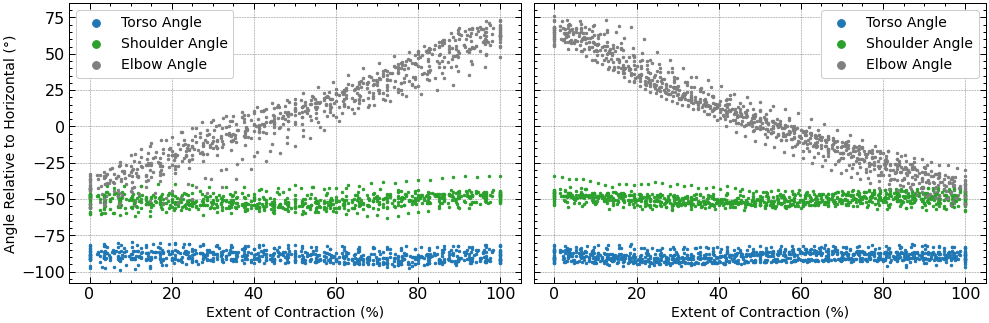

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection

# Set font size for consistency
plt.rcParams.update({'font.size': 12})

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Updated colors and clearer labels
colors = ['#1f77b4', '#2ca02c', '#7f7f7f']  # Teal, Green, Slate Grey
labels = ['Torso Angle', 'Shoulder Angle', 'Elbow Angle']

# Plot concentric contractions
for i in range(len(con)):
    t = np.linspace(0, 100, len(con[i]))
    for j, (color, label) in enumerate(zip(colors, labels)):
        if i == 0:
            ax[0].scatter(t, con[i][:, j]*180, c=color, s=6, label=label)
        else:
            ax[0].scatter(t, con[i][:, j]*180, c=color, s=6)

ax[0].set_xlabel('Extent of Contraction (%)', fontsize=14)
ax[0].set_ylabel('Angle Relative to Horizontal (°)', fontsize=14)
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].set_xticks(np.linspace(0, 100, 6))

# Plot eccentric contractions
for i in range(len(ecc)):
    t = np.linspace(0, 100, len(ecc[i]))
    for j, (color, label) in enumerate(zip(colors, labels)):
        if i == 0:
            ax[1].scatter(t, ecc[i][:, j]*180, c=color, s=6, label=label)
        else:
            ax[1].scatter(t, ecc[i][:, j]*180, c=color, s=6)

ax[1].set_xlabel('Extent of Contraction (%)', fontsize=14)
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].set_xticks(np.linspace(0, 100, 6))

# Custom legend with larger dots
class HandlerLargeDot(HandlerPathCollection):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        a = super().create_artists(legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans)
        for artist in a:
            artist.set_sizes([60])  # Large legend dots
        return a

ax[0].legend(loc='upper left', fontsize=14, handler_map={PathCollection: HandlerLargeDot()})
ax[1].legend(loc='upper right', fontsize=14, handler_map={PathCollection: HandlerLargeDot()})

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("C:\\Users\\Cian\\Downloads\\Bicep_Curl_Trajectory_no_regression_professional.png", dpi=300)
plt.show()


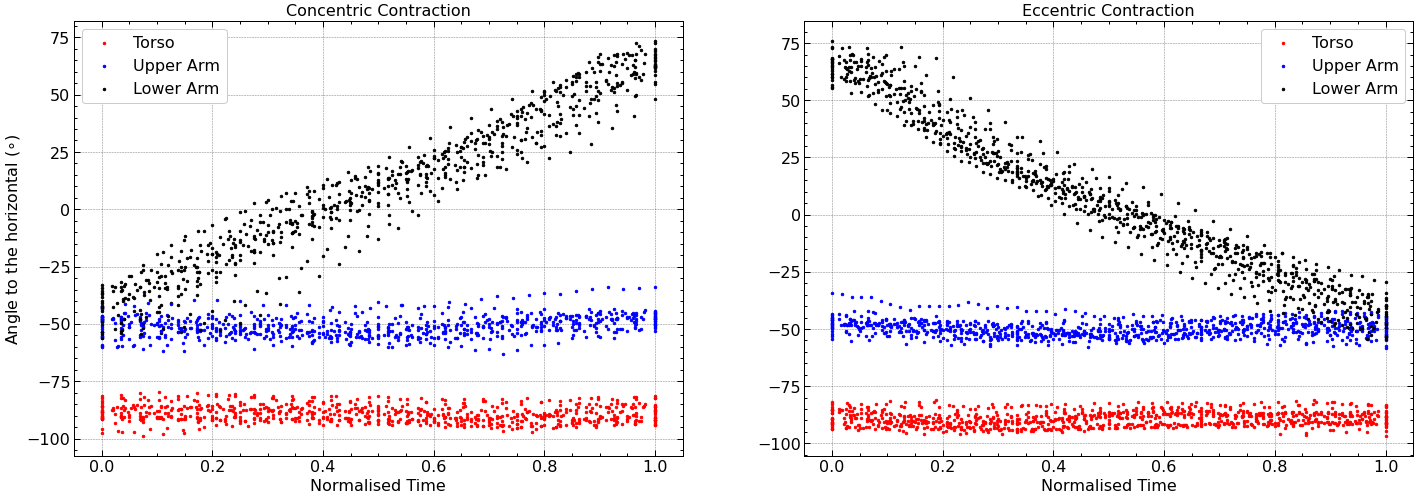

In [6]:
fig, ax = plt.subplots(1,2,figsize=(24,8))
for i in range(len(con)):
    t = np.linspace(0,1,len(con[i]))
    if i == 0:
        ax[0].scatter(t, con[i][:,0]*180,c='r',label='Torso',s=6)
        ax[0].scatter(t, con[i][:,1]*180,c='b',label='Upper Arm',s=6)
        ax[0].scatter(t, con[i][:,2]*180,c='black',label='Lower Arm',s=6)
    else:
        ax[0].scatter(t, con[i][:,0]*180,c='r',s=6)
        ax[0].scatter(t, con[i][:,1]*180,c='b',s=6)
        ax[0].scatter(t, con[i][:,2]*180,c='black',s=6)

for i in range(len(ecc)):
    t = np.linspace(0,1,len(ecc[i]))
    if i==0:
        ax[1].scatter(t, ecc[i][:,0]*180,c='r',label='Torso',s=6)
        ax[1].scatter(t, ecc[i][:,1]*180,c='b',label='Upper Arm',s=6)
        ax[1].scatter(t, ecc[i][:,2]*180,c='black',label='Lower Arm',s=6)
    else:
        ax[1].scatter(t, ecc[i][:,0]*180,c='r',s=6)
        ax[1].scatter(t, ecc[i][:,1]*180,c='b',s=6)
        ax[1].scatter(t, ecc[i][:,2]*180,c='black',s=6)
    
ax[0].set_xlabel('Normalised Time')
ax[1].set_xlabel('Normalised Time')
ax[0].set_ylabel('Angle to the horizontal ($\circ$)')
ax[0].set_title('Concentric Contraction')
ax[1].set_title('Eccentric Contraction')
ax[0].legend()
ax[1].legend()
# plt.savefig("C:\\Users\\Cian\\Downloads\\FIGURE.png")

It is obvious from the above plots that we can use linear regression to model the "Correct" technique. In future work this may not always be applicable, however, now it is sufficient. I will do the regression analytically, and not with gradient descent.

Looking into the future when we will want to make comparisons between an unseen example and the ideal trajectory, it makes the most sense to check at different values of normalised time what each angle should be, then compare these angles.

This means that it makes most sense here to linearly interpolate each dimension separately with normalised time. Each line will be of the form:
- $x_i=A_{0,i}+A_{1,i}t$

where $x_i$ can be $x_1,x_2,x_3$ corresponding to the angles to the horizontal of the Torso, Upper Arm, and Lower Arm, respectively. And $A_{0,i}$ and $A_{1,i}$ are constants to be determined.

In [7]:
#first acquire the x1, x2, x3 and the corresponding time values
#initiallize empty lists for each x
x1_con = []
x2_con = []
x3_con = []
x1_ecc = []
x2_ecc = []
x3_ecc = []

#initiallize empty lists for the time corresponding to each coordinate x
t_con = []
t_ecc = []
for i in range(len(con)):
    con_t = np.linspace(0,1,len(con[i]))
    ecc_t = np.linspace(0,1,len(ecc[i]))
    
    #first the concentric
    for j in range(len(con[i])):
        x1_con.append(con[i][j,0])
        x2_con.append(con[i][j,1])
        x3_con.append(con[i][j,2])
        t_con.append(con_t[j])
    
    #now the eccentric
    for k in range(len(ecc[i])):
        x1_ecc.append(ecc[i][k,0])
        x2_ecc.append(ecc[i][k,1])
        x3_ecc.append(ecc[i][k,2])
        t_ecc.append(ecc_t[k])
        
#now turn all the lists into numpy arrays
x1_con = np.array(x1_con)
x2_con = np.array(x2_con)
x3_con = np.array(x3_con)
x1_ecc = np.array(x1_ecc)
x2_ecc = np.array(x2_ecc)
x3_ecc = np.array(x3_ecc)

#Convert the lists to arrays
t_con = np.array(t_con)
t_ecc = np.array(t_ecc)

Now perform the regression, start with the concentric. The equations we need to solve will be of this form:
- $M \cdot A=v$

Where M is a matrix, A is the coefficient vector and v is the vector made up of x1, x2 or x3.

In [8]:
m_con = len(t_con)
M_con = np.array([[m_con,np.sum(t_con)],[np.sum(t_con),np.sum(t_con**2)]])
v1_con = np.array([np.sum(x1_con),np.sum(t_con*x1_con)])
v2_con = np.array([np.sum(x2_con),np.sum(t_con*x2_con)])
v3_con = np.array([np.sum(x3_con),np.sum(t_con*x3_con)])

A1_con = np.linalg.solve(M_con,v1_con)
A2_con = np.linalg.solve(M_con,v2_con)
A3_con = np.linalg.solve(M_con,v3_con)

#Now put all the constants together in a single array
coeffs_con = np.stack((A1_con,A2_con,A3_con))

Now repeat the same with the eccentric.

In [9]:
m_ecc = len(t_ecc)
M_ecc = np.array([[m_ecc,np.sum(t_ecc)],[np.sum(t_ecc),np.sum(t_ecc**2)]])
v1_ecc = np.array([np.sum(x1_ecc),np.sum(t_ecc*x1_ecc)])
v2_ecc = np.array([np.sum(x2_ecc),np.sum(t_ecc*x2_ecc)])
v3_ecc = np.array([np.sum(x3_ecc),np.sum(t_ecc*x3_ecc)])

A1_ecc = np.linalg.solve(M_ecc,v1_ecc)
A2_ecc = np.linalg.solve(M_ecc,v2_ecc)
A3_ecc = np.linalg.solve(M_ecc,v3_ecc)

#Now put all the constants together in a single array
coeffs_ecc = np.stack((A1_ecc,A2_ecc,A3_ecc))

Now plot the same graph as above but now with the new lineas that we have just calculated.

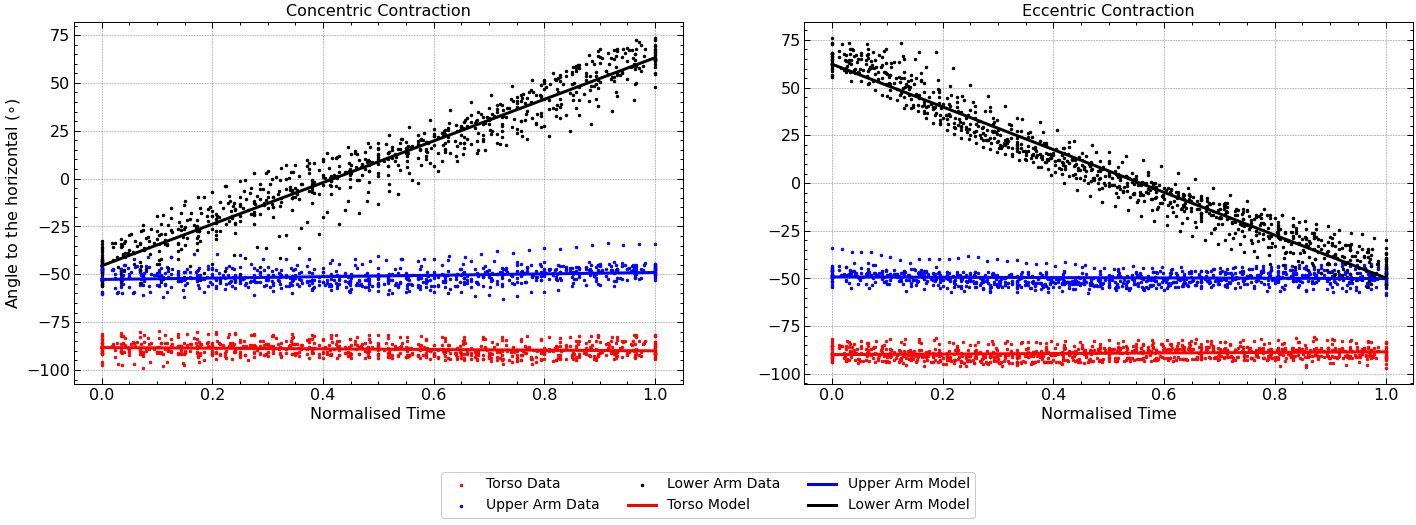

In [13]:
#create the data to plot the lines
time = np.linspace(0,1,200)
T = np.stack((np.ones(200),time))
eccentric = (coeffs_ecc @ T) * 180
concentric = (coeffs_con @ T) * 180

#Now plot
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
for i in range(len(con)):
    t = np.linspace(0,1,len(con[i]))
    if i == 0:
        ax[0].scatter(t, con[i][:,0]*180, c='r', label='Torso Data', s=6)
        ax[0].scatter(t, con[i][:,1]*180, c='b', label='Upper Arm Data', s=6)
        ax[0].scatter(t, con[i][:,2]*180, c='black', label='Lower Arm Data', s=6)
    else:
        ax[0].scatter(t, con[i][:,0]*180, c='r', s=6)
        ax[0].scatter(t, con[i][:,1]*180, c='b', s=6)
        ax[0].scatter(t, con[i][:,2]*180, c='black', s=6)

for i in range(len(ecc)):
    t = np.linspace(0,1,len(ecc[i]))
    if i == 0:
        ax[1].scatter(t, ecc[i][:,0]*180, c='r', label='Torso Data', s=6)
        ax[1].scatter(t, ecc[i][:,1]*180, c='b', label='Upper Arm Data', s=6)
        ax[1].scatter(t, ecc[i][:,2]*180, c='black', label='Lower Arm Data', s=6)
    else:
        ax[1].scatter(t, ecc[i][:,0]*180, c='r', s=6)
        ax[1].scatter(t, ecc[i][:,1]*180, c='b', s=6)
        ax[1].scatter(t, ecc[i][:,2]*180, c='black', s=6)

# Plot the lines of best fit and label them
ax[0].plot(time, concentric[0,:], c='r', lw=3, label='Torso Model')
ax[0].plot(time, concentric[1,:], c='b', lw=3, label='Upper Arm Model')
ax[0].plot(time, concentric[2,:], c='black', lw=3, label='Lower Arm Model')

# No need to label fit lines in ax[1]; already captured in legend from ax[0]
ax[1].plot(time, eccentric[0,:], c='r', lw=3)
ax[1].plot(time, eccentric[1,:], c='b', lw=3)
ax[1].plot(time, eccentric[2,:], c='black', lw=3)

# Set axis labels and titles
ax[0].set_xlabel('Normalised Time')
ax[1].set_xlabel('Normalised Time')
ax[0].set_ylabel('Angle to the horizontal ($\circ$)')
ax[0].set_title('Concentric Contraction')
ax[1].set_title('Eccentric Contraction')

# Shared legend below both subplots
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=14)
plt.subplots_adjust(bottom=0.25)  # Add space for the legend

# Save the figure
plt.savefig("C:\\Users\\Cian\\Downloads\\FIGURE.png")

Save the coefficients as a .npy file in the models folder.

In [35]:
# np.save('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Technique Modelling\\Models\\Concentric.npy', coeffs_con)
# np.save('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 2\\Technique Modelling\\Models\\Eccentric.npy', coeffs_ecc)